In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from   sklearn.metrics       import mean_squared_error, mean_absolute_error;
from   sklearn.linear_model  import LinearRegression, BayesianRidge;
from   sklearn.tree          import DecisionTreeRegressor;
from   sklearn.preprocessing import PolynomialFeatures

In [ ]:
df=pd.read_csv('/content/student_extended_ml_dataset2.csv')

In [ ]:
df

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low
...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   bool   
 9   Study_Hours_Group  5000 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 356.6+ KB


In [ ]:
#analyzing datatypes od columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

6

In [ ]:
#missing values
missing_percentages = df.isna().sum().sort_values(ascending=False)
missing_percentages

Name                 0
Age                  0
Gender               0
Hours_Studied        0
IQ                   0
Physics_Marks        0
Math_Marks           0
Chemistry_Marks      0
Has_Part_Time_Job    0
Study_Hours_Group    0
dtype: int64

In [ ]:
# Printing again
print("Average Math score is    : {}".format(np.mean(df['Math_Marks'])))
print("Average Physics score is : {}".format(np.mean(df['Physics_Marks'])))
print("Average Chemistry score is : {}".format(np.mean(df['Chemistry_Marks'])))

Average Math score is    : 69.816
Average Physics score is : 70.311
Average Chemistry score is : 69.7988


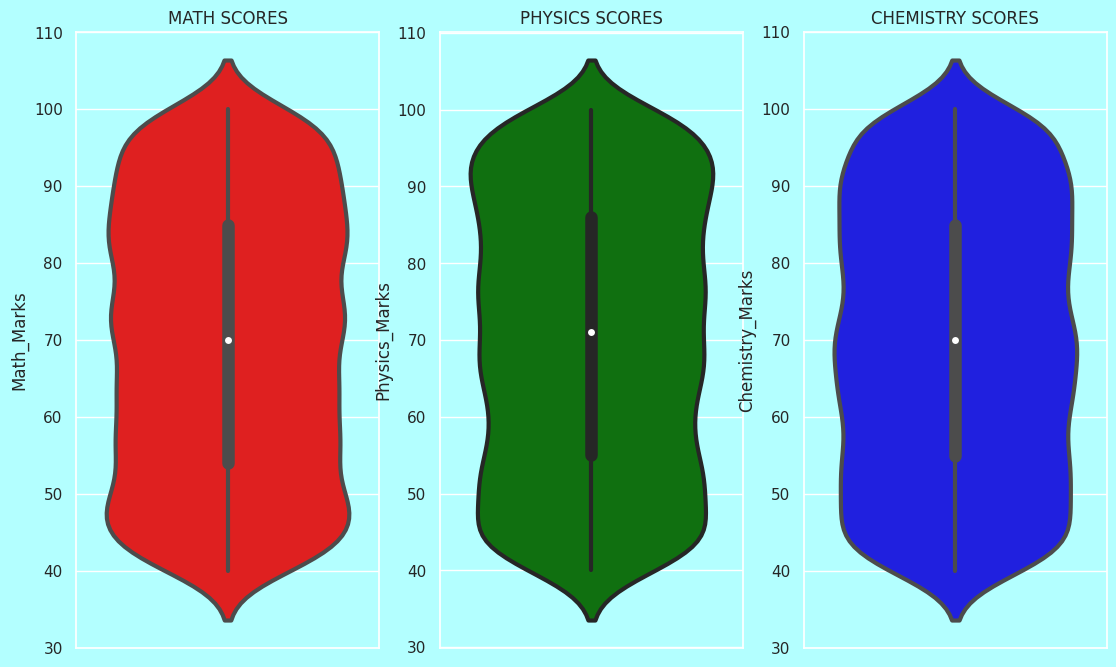

In [ ]:
plt.rcParams['axes.facecolor'] = "#b3ffff"
plt.rcParams['figure.facecolor'] ="#b3ffff"
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='Math_Marks',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('PHYSICS SCORES')
sns.violinplot(y='Physics_Marks',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('CHEMISTRY SCORES')
sns.violinplot(y='Chemistry_Marks',data=df,color='blue',linewidth=3)
plt.show()

### Exploratory Analysis and Visualization


Hours Studied

In [ ]:
hours=df.Hours_Studied.sort_values()
hours

4053    1.002452
32      1.004174
716     1.004702
1382    1.013077
4153    1.013492
          ...   
251     9.991261
1265    9.991576
618     9.992324
4628    9.993425
476     9.999925
Name: Hours_Studied, Length: 5000, dtype: float64

<Axes: >

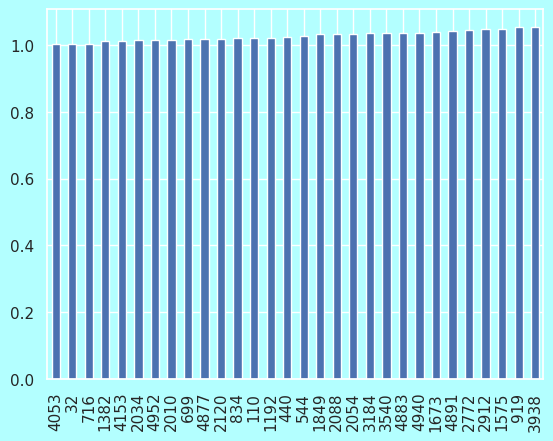

In [ ]:
hours[:30].plot(kind='bar')

<Axes: >

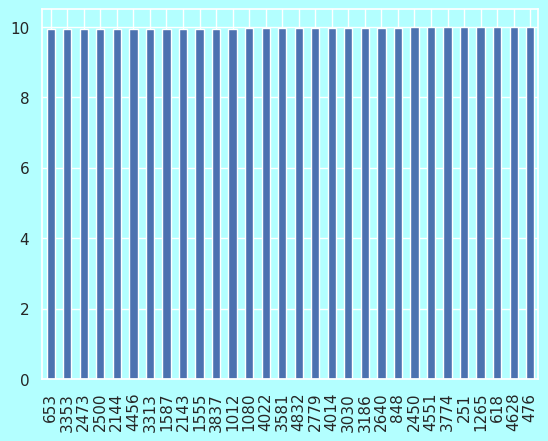

In [ ]:
hours[4970:].plot(kind='bar')

IQ

In [ ]:
IQ=df.IQ.sort_values()
IQ

3005     80
4231     80
2724     80
962      80
2765     80
       ... 
186     150
3641    150
4297    150
4288    150
1894    150
Name: IQ, Length: 5000, dtype: int64

<Axes: >

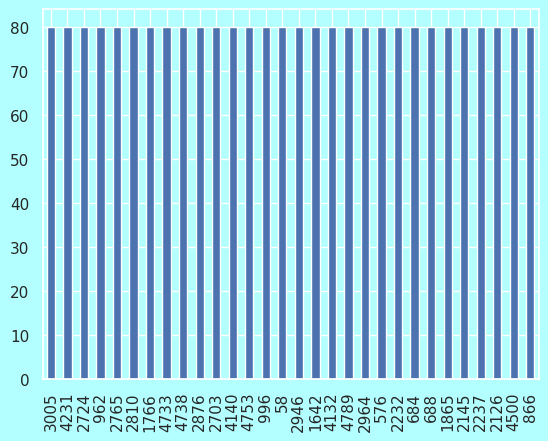

In [ ]:
IQ[:30].plot(kind='bar')

In [ ]:
IQ=df.IQ.sort_values()
IQ

3005     80
4231     80
2724     80
962      80
2765     80
       ... 
186     150
3641    150
4297    150
4288    150
1894    150
Name: IQ, Length: 5000, dtype: int64

In [ ]:
uiq = df.IQ.value_counts().sort_values()
uiq.count()

71

<Axes: >

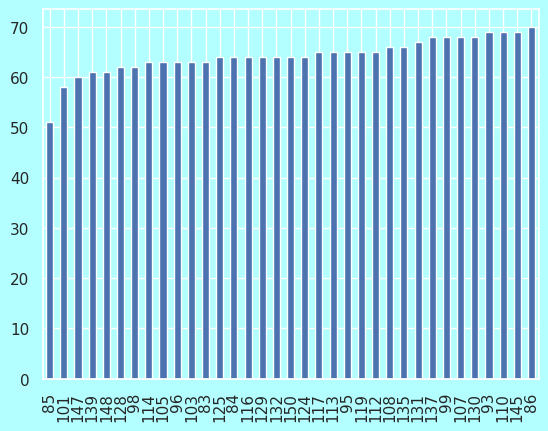

In [ ]:
uiq[:35].plot(kind='bar')

<Axes: >

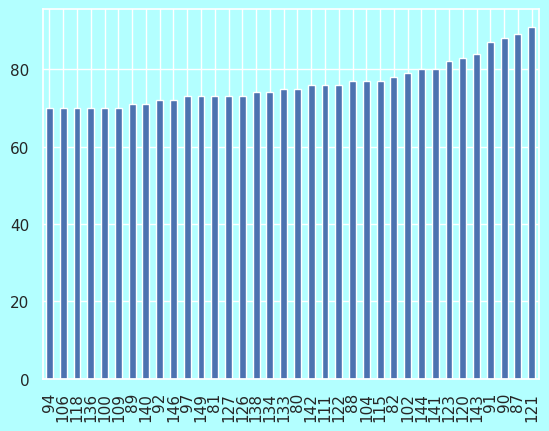

In [ ]:
uiq[35:].plot(kind='bar')

### Scores vs Study Groups

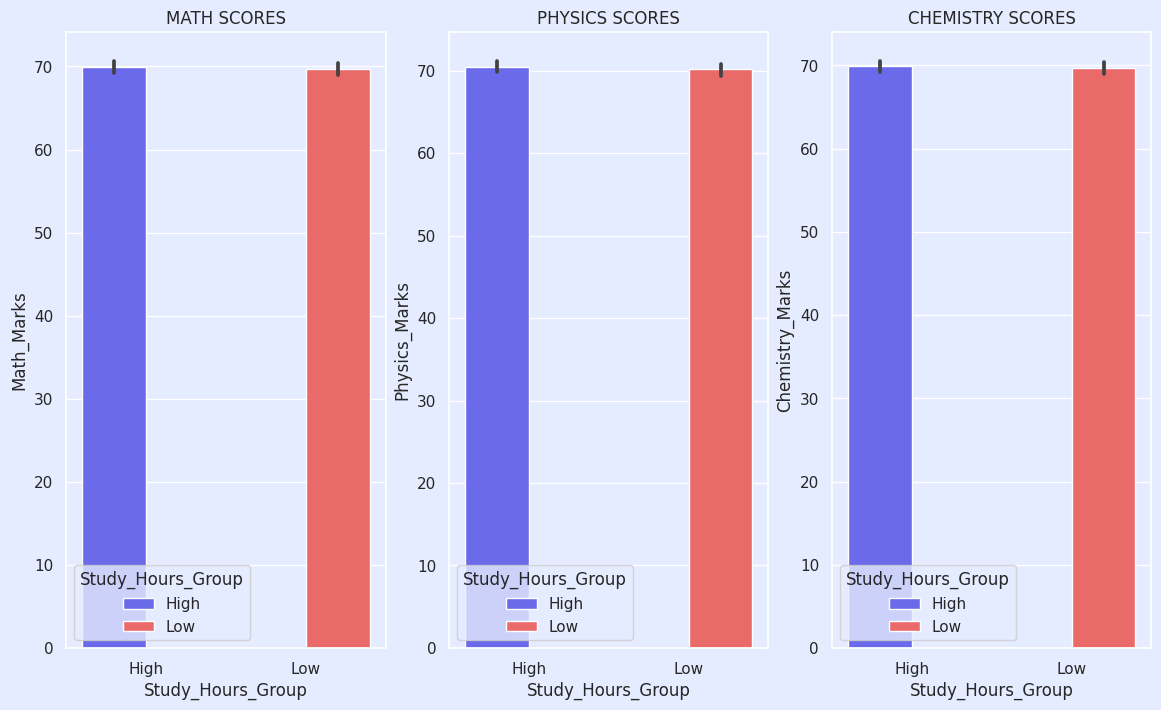

In [ ]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='Study_Hours_Group',y='Math_Marks',data=df,hue='Study_Hours_Group',palette='seismic')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='Study_Hours_Group',y='Physics_Marks',data=df,hue='Study_Hours_Group',palette='seismic')
plt.title('PHYSICS SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='Study_Hours_Group',y='Chemistry_Marks',data=df,hue='Study_Hours_Group',palette='seismic')
plt.title('CHEMISTRY SCORES')
plt.show()

### Scores vs Part time job

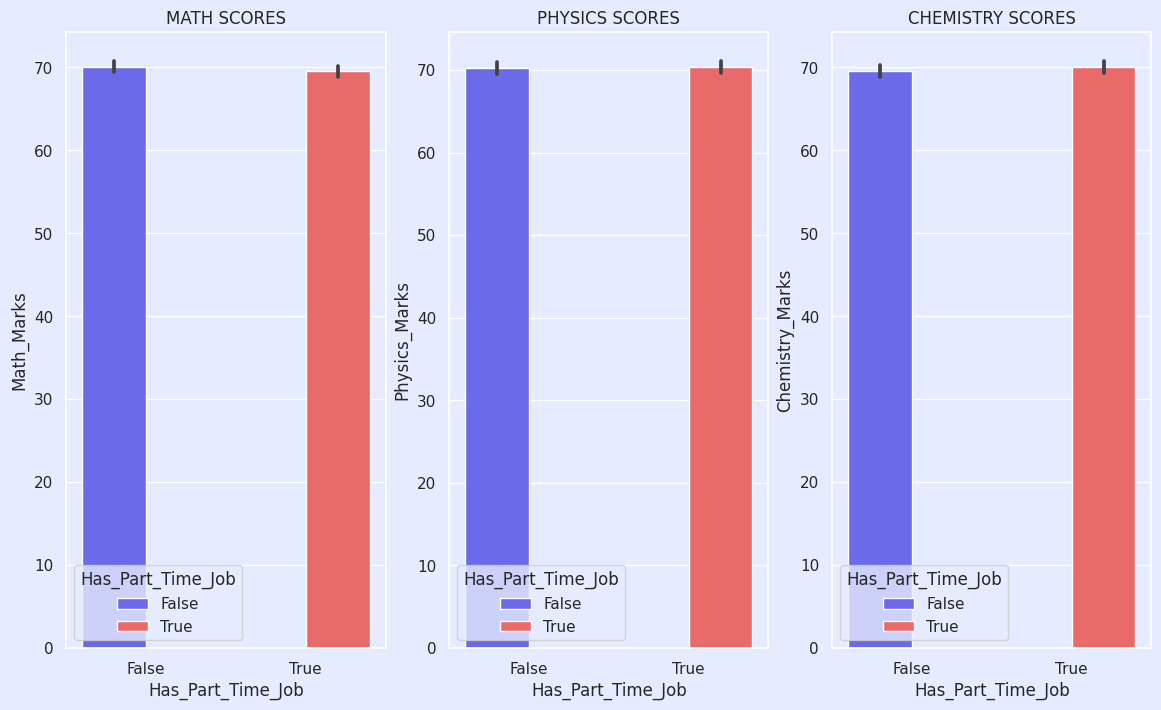

In [ ]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='Has_Part_Time_Job',y='Math_Marks',data=df,hue='Has_Part_Time_Job',palette='seismic')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='Has_Part_Time_Job',y='Physics_Marks',data=df,hue='Has_Part_Time_Job',palette='seismic')
plt.title('PHYSICS SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='Has_Part_Time_Job',y='Chemistry_Marks',data=df,hue='Has_Part_Time_Job',palette='seismic')
plt.title('CHEMISTRY SCORES')
plt.show()

### Scores vs Gender

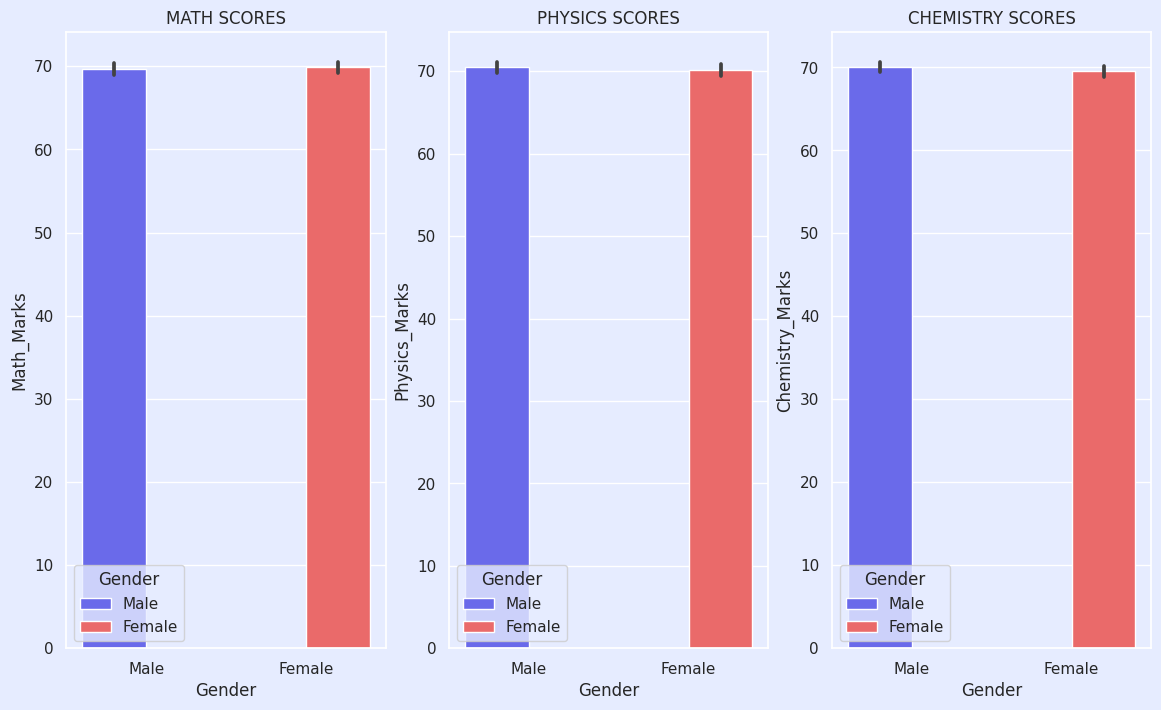

In [ ]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='Gender',y='Math_Marks',data=df,hue='Gender',palette='seismic')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='Gender',y='Physics_Marks',data=df,hue='Gender',palette='seismic')
plt.title('PHYSICS SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='Gender',y='Chemistry_Marks',data=df,hue='Gender',palette='seismic')
plt.title('CHEMISTRY SCORES')
plt.show()

# Model

In [ ]:
df['Gender'] = df['Gender'].astype(str).replace({'Male': 0, 'Female': 1})
df['Has_Part_Time_Job'] = df['Has_Part_Time_Job'].astype(str).replace({'False': '0', 'True': '1'})
df['Study_Hours_Group'] = df['Study_Hours_Group'].astype(str).replace({'Low': 0, 'High': 1})

In [ ]:
df

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,0,8.140821,92,87,43,85,1,1
1,Sandra Wiggins,35,1,9.825626,112,86,81,54,0,1
2,Julia Olsen,33,0,8.835372,131,87,52,57,1,1
3,Robert Pennington,33,0,2.482483,138,70,86,83,0,0
4,Kayla Sellers,28,1,4.419793,90,95,48,83,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,1,3.653474,143,93,59,85,1,0
4996,Donna Hamilton,33,1,1.096493,132,68,70,99,1,0
4997,Mrs. Ashley Howard,38,0,4.156770,111,76,96,71,0,0
4998,Kendra Murray,18,1,6.788548,137,81,98,73,0,1


In [ ]:
X = df[['Age',	'Gender',	'Hours_Studied','Physics_Marks',	'Math_Marks','Chemistry_Marks',	'Has_Part_Time_Job','Study_Hours_Group']]

In [ ]:
y = df['IQ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred=reg.predict(X_test)

In [ ]:
pred[:10]

array([114.10944659, 114.28155668, 115.17369687, 116.52742405,
       115.01411842, 115.56623121, 114.41432686, 116.41224676,
       115.25199458, 115.82925241])